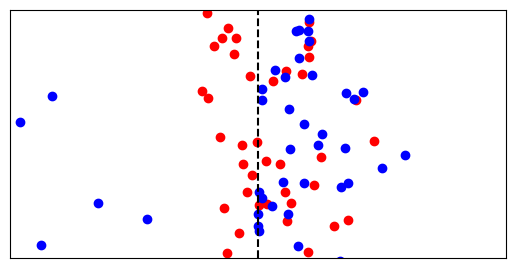

In [145]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FuncAnimation, PillowWriter

# Set up the figure and axes
fig, ax = plt.subplots()
ax.set_xlim(0, 2)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.axvline(1, linestyle='dashed', color='black')  # Semi-permeable membrane

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
# ax.set_frame_on(False)
fig.patch.set_alpha(0.)

# num points
big = 35
small = 5
global should_stop
should_stop = False
# Initialize positions of particles
np.random.seed(2023)
left_red_points = np.random.rand(big, 2)
left_red_points[:,0] *= 0.5
left_red_points += np.array([0.3, 0])
left_blue_points = np.random.rand(small, 2)
left_blue_points[:,0] *= 0.5
right_red_points = np.random.rand(small, 2)
right_red_points[:,0] *= 0.5
right_red_points += np.array([1, 0])
right_blue_points = np.random.rand(big, 2)
right_blue_points[:,0] *= 0.5
right_blue_points += np.array([1, 0])

# Plot initial positions
left_red_scatter = ax.scatter(left_red_points[:, 0], left_red_points[:, 1], c='red')
left_blue_scatter = ax.scatter(left_blue_points[:, 0], left_blue_points[:, 1], c='blue')
right_red_scatter = ax.scatter(right_red_points[:, 0], right_red_points[:, 1], c='red')
right_blue_scatter = ax.scatter(right_blue_points[:, 0], right_blue_points[:, 1], c='blue')

def update(frame):
    global left_red_points, left_blue_points, right_red_points, right_blue_points, should_stop
    if should_stop:
        return
    # Move particles randomly
    left_red_movement = np.random.randn(big, 2) * 0.01
    left_blue_movement = np.random.randn(small, 2) * 0.01
    right_red_movement = np.random.randn(small, 2) * 0.01
    right_blue_movement = np.random.randn(big, 2) * 0.01

    left_red_movement[:, 0] = np.abs(left_red_movement[:, 0])
    a = np.random.choice(left_red_movement.shape[0], size = (left_red_points[:,0]>1).sum())
    # left_red_movement[a,0] = -0.005 * (left_red_points[:,0]>1).sum()

    a = np.random.choice(right_blue_movement.shape[0], size = 5)
    right_blue_movement[a,0] -= 0.01
    
    # Update positions
    left_red_points += left_red_movement
    
    # Ensure blue points don't cross the line
    new_left_blue_points = left_blue_points + left_blue_movement
    new_left_blue_points[:, 0] = np.where(new_left_blue_points[:, 0] <= 1, new_left_blue_points[:, 0], left_blue_points[:, 0])
    left_blue_points = new_left_blue_points
    
    right_red_points += right_red_movement
    
    # Ensure blue points don't cross the line
    new_right_blue_points = right_blue_points + right_blue_movement
    new_right_blue_points[:, 0] = np.where(new_right_blue_points[:, 0] >= 1, new_right_blue_points[:, 0], right_blue_points[:, 0])
    right_blue_points = new_right_blue_points
    
    # for every point, check if it crossed the box borders, and if so, move it back

    for point in np.concatenate((left_red_points, left_blue_points, right_red_points, right_blue_points)):
        if point[1] >= 0.95:
            point[1] -= np.random.rand() * 0.01
        if point[1] <= 0.05:
            point[1] += np.random.rand() * 0.01

    
    # Update scatter plots
    left_red_scatter.set_offsets(left_red_points)
    left_blue_scatter.set_offsets(left_blue_points)
    right_red_scatter.set_offsets(right_red_points)
    right_blue_scatter.set_offsets(right_blue_points)
    fig.canvas.draw()  # Update the figure

    if (left_red_points[:,0]>1).sum() > int((big+small)/2):
        should_stop = True
        anim.event_source.stop()


    # Stop the animation when conditions are met
    # if (len(right_red_points) >= big):
    #     anim.event_source.stop()

# Create animation
anim = FuncAnimation(fig, update, frames=np.arange(60), interval=65, repeat=False)

# Save animation as GIF
animation_filename = 'free.gif'
anim.save(animation_filename, writer='pillow')
plt.show()

# # Save animation as HTML
# animation_html = anim.to_jshtml()
# with open('animation.html', 'w') as f:
#     f.write(animation_html)
# plt.show()


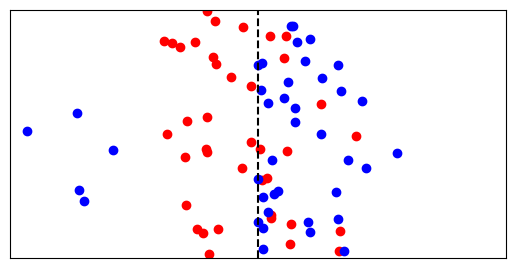

In [147]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FuncAnimation, PillowWriter

# Set up the figure and axes
fig, ax = plt.subplots()
ax.set_xlim(0, 2)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.axvline(1, linestyle='dashed', color='black')  # Semi-permeable membrane

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
# ax.set_frame_on(False)
fig.patch.set_alpha(0.)

# num points
big = 35
small = 5
global should_stop
should_stop = False
# Initialize positions of particles
np.random.seed(2023)
left_red_points = np.random.rand(big, 2)
left_red_points[:,0] *= 0.5
left_red_points += np.array([0.3, 0])
left_blue_points = np.random.rand(small, 2)
left_blue_points[:,0] *= 0.5
right_red_points = np.random.rand(small, 2)
right_red_points[:,0] *= 0.5
right_red_points += np.array([1, 0])
right_blue_points = np.random.rand(big, 2)
right_blue_points[:,0] *= 0.5
right_blue_points += np.array([1, 0])

# Plot initial positions
left_red_scatter = ax.scatter(left_red_points[:, 0], left_red_points[:, 1], c='red')
left_blue_scatter = ax.scatter(left_blue_points[:, 0], left_blue_points[:, 1], c='blue')
right_red_scatter = ax.scatter(right_red_points[:, 0], right_red_points[:, 1], c='red')
right_blue_scatter = ax.scatter(right_blue_points[:, 0], right_blue_points[:, 1], c='blue')

def update(frame):
    global left_red_points, left_blue_points, right_red_points, right_blue_points, should_stop
    if should_stop:
        return
    # Move particles randomly
    left_red_movement = np.random.randn(big, 2) * 0.01
    left_blue_movement = np.random.randn(small, 2) * 0.01
    right_red_movement = np.random.randn(small, 2) * 0.01
    right_blue_movement = np.random.randn(big, 2) * 0.01

    left_red_movement[:, 0] = np.abs(left_red_movement[:, 0])
    a = np.random.choice(left_red_movement.shape[0], size = (left_red_points[:,0]>1).sum())
    left_red_movement[a,0] = -0.003 * (left_red_points[:,0]>1).sum()

    a = np.random.choice(right_blue_movement.shape[0], size = 5)
    right_blue_movement[a,0] -= 0.01
    
    # Update positions
    left_red_points += left_red_movement
    
    # Ensure blue points don't cross the line
    new_left_blue_points = left_blue_points + left_blue_movement
    new_left_blue_points[:, 0] = np.where(new_left_blue_points[:, 0] <= 1, new_left_blue_points[:, 0], left_blue_points[:, 0])
    left_blue_points = new_left_blue_points
    
    right_red_points += right_red_movement
    
    # Ensure blue points don't cross the line
    new_right_blue_points = right_blue_points + right_blue_movement
    new_right_blue_points[:, 0] = np.where(new_right_blue_points[:, 0] >= 1, new_right_blue_points[:, 0], right_blue_points[:, 0])
    right_blue_points = new_right_blue_points
    
    # for every point, check if it crossed the box borders, and if so, move it back

    for point in np.concatenate((left_red_points, left_blue_points, right_red_points, right_blue_points)):
        if point[1] >= 0.95:
            point[1] -= np.random.rand() * 0.01
        if point[1] <= 0.05:
            point[1] += np.random.rand() * 0.01

    
    # Update scatter plots
    left_red_scatter.set_offsets(left_red_points)
    left_blue_scatter.set_offsets(left_blue_points)
    right_red_scatter.set_offsets(right_red_points)
    right_blue_scatter.set_offsets(right_blue_points)
    fig.canvas.draw()  # Update the figure

    if (left_red_points[:,0]>1).sum() > int((big+small)/2):
        should_stop = True
        anim.event_source.stop()


    # Stop the animation when conditions are met
    # if (len(right_red_points) >= big):
    #     anim.event_source.stop()

# Create animation
anim = FuncAnimation(fig, update, frames=np.arange(70), interval=65, repeat=False)

# Save animation as GIF
animation_filename = 'charged.gif'
anim.save(animation_filename, writer='pillow')
plt.show()

# # Save animation as HTML
# animation_html = anim.to_jshtml()
# with open('animation.html', 'w') as f:
#     f.write(animation_html)
# plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


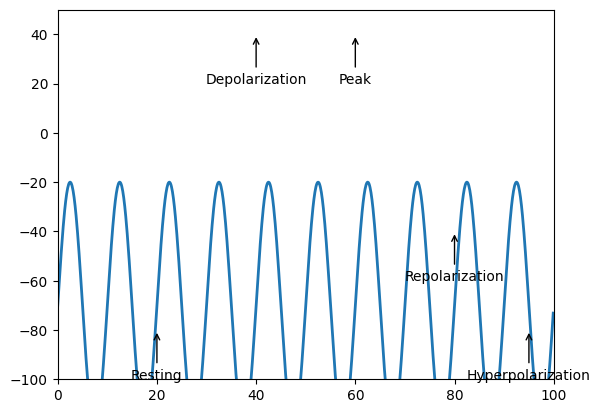

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create time and voltage data
time = np.linspace(0, 100, 1000)
voltage = -70 + 50 * np.sin(2 * np.pi * 0.1 * time)

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, 100)
ax.set_ylim(-100, 50)
line, = ax.plot([], [], lw=2)
arrows = []

# Define stages and their corresponding positions
stages = {
    "Resting": (20, -80),
    "Depolarization": (40, 40),
    "Peak": (60, 40),
    "Repolarization": (80, -40),
    "Hyperpolarization": (95, -80)
}

# Add arrows with labels
for stage, (x, y) in stages.items():
    arrow = ax.annotate(stage, xy=(x, y), xytext=(x, y - 20),
                        arrowprops=dict(facecolor='black', arrowstyle="->"),
                        fontsize=10, ha="center")
    arrows.append(arrow)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(time[:i], voltage[:i])
    return line,

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(time), blit=True, interval=10)
ani.save("action_potential_animation.gif", writer="pillow")

plt.show()


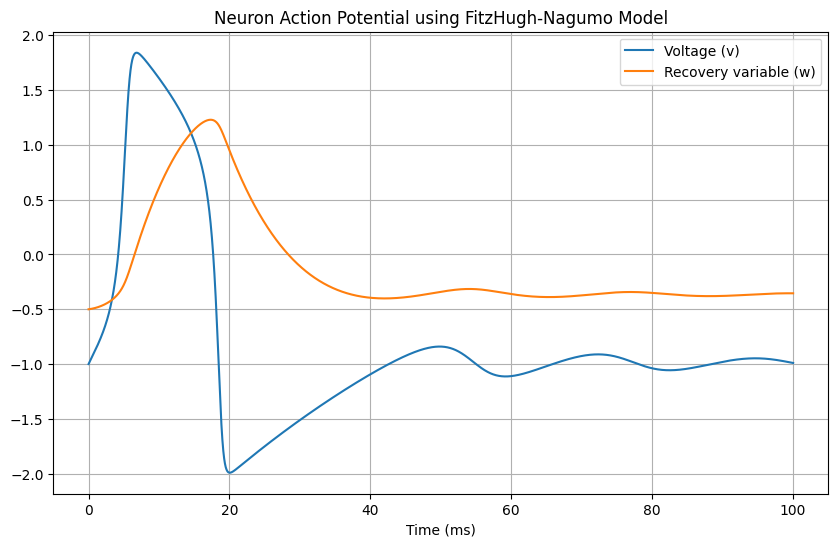

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# FitzHugh-Nagumo model parameters
a = 0.7
b = 0.8
tau = 12.5
I = 0.3
# Define the differential equations
def fitzhugh_nagumo(y, t):
    v, w = y
    dv_dt = v - (v**3)/3 - w + I
    dw_dt = (v + a - b*w) / tau
    return [dv_dt, dw_dt]

# Time points
t = np.linspace(0, 100, 10000)

# Initial conditions
v0 = -1.0
w0 = -0.5
initial_conditions = [v0, w0]

# Solve the differential equations
from scipy.integrate import odeint
solution = odeint(fitzhugh_nagumo, initial_conditions, t)

# Extract voltage and recovery variable
voltage = solution[:, 0]
recovery = solution[:, 1]

# Plot the neuron action potential
plt.figure(figsize=(10, 6))
plt.plot(t, voltage, label='Voltage (v)')
plt.plot(t, recovery, label='Recovery variable (w)')

plt.title('Neuron Action Potential using FitzHugh-Nagumo Model')
plt.xlabel('Time (ms)')
plt.legend()
plt.grid(True)
plt.show()


In [124]:
q = voltage[0:4000]

In [127]:
x = np.concatenate([voltage[8000:],voltage])

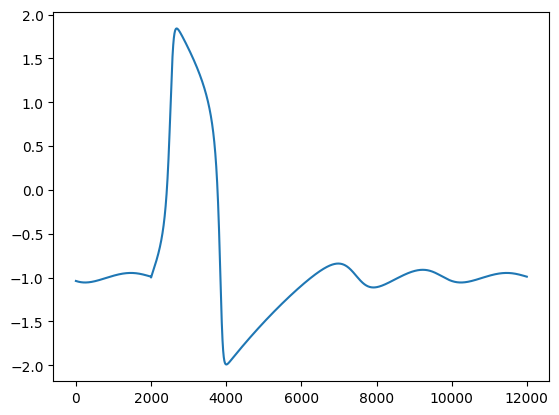

In [112]:
plt.plot(x)
ax = plt.gca()
# ax.yaxis.set_visible(False)
# ax.xaxis.set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# plt.savefig('fitzhugh.png', dpi=300, bbox_inches='tight', transparent=True)


C:\Users\ahmad\AppData\Local\Temp\ipykernel_4080\3244784460.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, 1.8,6))


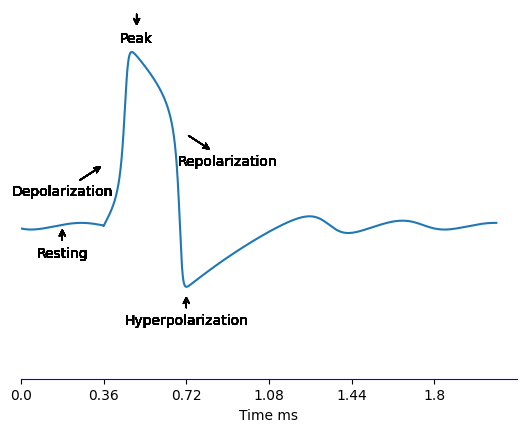

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Assuming you have some data in the 'voltage' array
# voltage = x.copy() # Replace with your data

# Create a figure and axis for the plot
fig, ax = plt.subplots()
line, = ax.plot([], [])  # This will be the line object representing your data

# Set the axis limits
ax.set_xlim(0, len(voltage) - 1)
ax.set_ylim(min(voltage), max(voltage))
ax.set_xlim(0, len(voltage) - 1)
ax.set_ylim(min(voltage)-1.5, max(voltage)+0.7)
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('blue')

arrows = []

# Define stages and their corresponding positions
stages = {
    "Resting": (1000, -1, "->",0),
    "Depolarization": (2000, 0,"->",+1000),
    "Peak": (2800, 2.5,"<-", 0),
    "Repolarization": (4000, 0.5,"<-", -1000),
    "Hyperpolarization": (4000, -2.1,"->",0)
}

# Add arrows with labels
for stage, (x, y,arstyle,temp) in stages.items():
    arrow = ax.annotate(stage, xy=(x,y), xytext=(x-temp, y-0.5),
                        arrowprops=dict(facecolor='black', arrowstyle=arstyle),
                        fontsize=10, ha="center")
    arrows.append(arrow)

ax.set_xticklabels(np.linspace(0, 1.8,6))
ax.set_xlabel('Time ms')
def init():
    line.set_data([], [])
    return line,

# Animation function (called for each frame)
def animate(frame):
    x = np.arange(frame + 1)
    y = voltage[:frame + 1]
    line.set_data(x, y)
    [(2000), (3800), (4000)]
    # Define stages and their corresponding positions
    stages = {
        "Resting": (1000, -1, "->",0),
        "Depolarization": (2000, 0,"->",+1000),
        "Peak": (2800, 2.5,"<-", 0),
        "Repolarization": (4000, 0.5,"<-", -1000),
        "Hyperpolarization": (4000, -2.1,"->",0)
    }

    # Add arrows with labels
    for stage, (x, y,arstyle,temp) in stages.items():
        if frame >= x:
            arrow = ax.annotate(stage, xy=(x,y), xytext=(x-temp, y-0.5),
                                arrowprops=dict(facecolor='black', arrowstyle=arstyle),
                                fontsize=10, ha="center")
            arrows.append(arrow)

    return line,

# Create the animation
anim = FuncAnimation(fig, animate, frames=np.arange(0, len(voltage),500), interval=10, init_func=init, blit=True)
anim.save('voltage1.gif', writer='pillow', fps=1000)
# Display the animation
plt.show()
